# Задание: тип визуализации данных
Загрузите данные по ЕГЭ за последние годы

https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv

выберите данные за 2018-2019 учебный год.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('https://video.ittensive.com/python-advanced/data-9722-2019-10-14.utf.csv', sep=';')
data['AdmArea'] = data['AdmArea'].str.split().str[0]
data['District'] = data['District'].str.replace('район', '').str.strip()
data = data[data['YEAR'] == '2018-2019']
data.head()

,ID,EDU_NAME,global_id,YEAR,AdmArea,District,PASSES_OVER_220,PASSER_UNDER_160,Unnamed: 8
1498,9734,Государственное бюджетное общеобразовательное ...,1011905064,2018-2019,Восточный,Богородское,41,112,NaN
1499,9735,Государственное бюджетное общеобразовательное ...,1011905068,2018-2019,Восточный,Метрогородок,12,44,NaN
1500,9736,Государственное бюджетное общеобразовательное ...,1011905069,2018-2019,Восточный,Новогиреево,19,37,NaN
1501,9737,Автономная некоммерческая организация средняя ...,1011905070,2018-2019,Восточный,Сокольники,1,3,NaN
1502,9738,Государственное бюджетное общеобразовательное ...,1011905071,2018-2019,Западный,Крылатское,25,51,NaN


**Выберите тип диаграммы для отображения результатов по административному округу Москвы**, постройте выбранную диаграмму для количества школьников, написавших ЕГЭ на 220 баллов и выше.

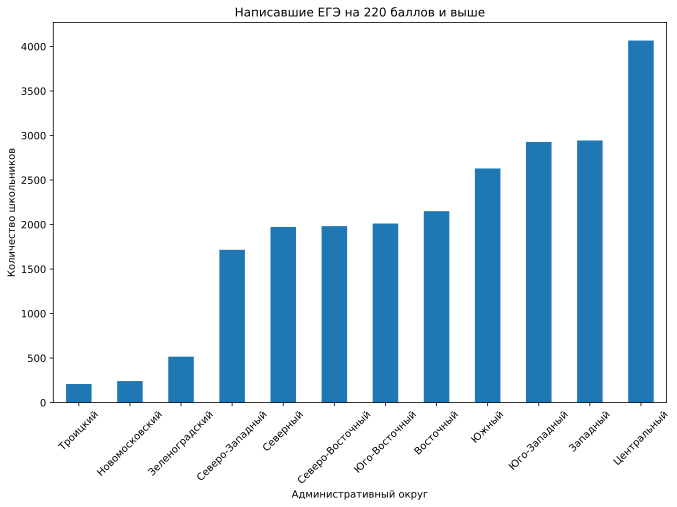

In [2]:
adm_over_220 = data.groupby('AdmArea')['PASSES_OVER_220'].sum().sort_values()
adm_over_220.index.name = 'Административный округ'

fig = plt.figure(figsize=(11, 7))
area = fig.add_subplot(1, 1, 1)
area.set_ylabel('Количество школьников')
area.set_title('Написавшие ЕГЭ на 220 баллов и выше')
adm_over_220.plot.bar(ax=area, rot=45);

**Выберите тип диаграммы и постройте ее для районов** Северо-Западного административного округа Москвы для количества школьников, написавших ЕГЭ на 220 баллов и выше.

В Строгино 188 школьников, написавших ЕГЭ на 220 баллов и выше.


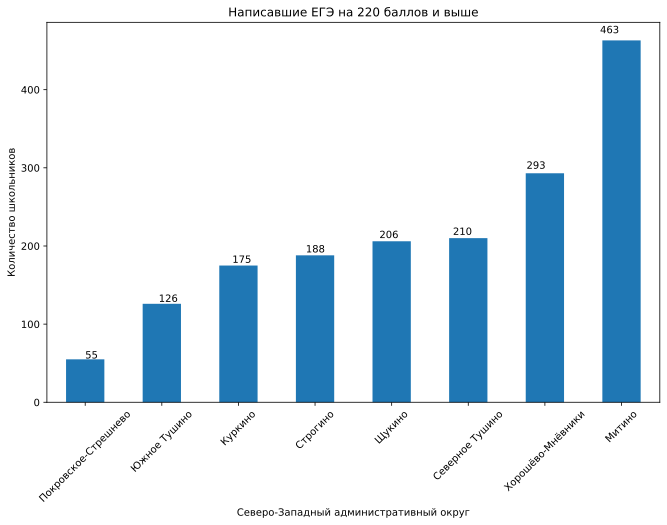

In [3]:
nwadm_over_220 = data[data['AdmArea'] == 'Северо-Западный']
nwadm_over_220 = nwadm_over_220.groupby('District')['PASSES_OVER_220'].sum().sort_values()
nwadm_over_220.index.name = 'Северо-Западный административный округ'

fig = plt.figure(figsize=(11, 7))
area = fig.add_subplot(1, 1, 1)
area.set_ylabel('Количество школьников')
area.set_title('Написавшие ЕГЭ на 220 баллов и выше')
nwadm_over_220.plot.bar(ax=area, rot=45)

for x, amount in enumerate(nwadm_over_220):
    area.annotate(amount, xy=(x * 0.96, amount * 1.02))

print('В Строгино {} школьников, написавших ЕГЭ на 220 баллов и выше.'.format(nwadm_over_220.loc['Строгино']))